In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df_kolektor = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data\data_kolektor.csv")
df_kolektor.head(5)

,Unnamed: 0.1,Unnamed: 0,collector_name,collector_address,collector_number,collector_nik,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate
0,0,0,John Butler,"Gg. Rungkut Industri No. 4\nBau-Bau, LA 50483",+62-0484-217-8451,2992432598137030,0,sms or WA,7,14400000,35700000,277706,40.0
1,1,1,Jason Sandoval,"Gg. Sadang Serang No. 6\nSerang, BE 92453",+62 (32) 351-4115,2063940591864525,11,panggilan,35,79000000,160500000,22382611,49.0
2,2,2,Mark Smith,"Gg. Joyoboyo No. 12\nCimahi, Kalimantan Barat ...",+62-14-020-6307,6955003244943831,4,sms or WA,6,7100000,26700000,205389,27.0
3,3,3,George Thomas,"Jalan Cikutra Timur No. 53\nBatu, Jawa Barat 4...",+62 (01) 018 9218,3175836365216917,29,datang ke tempat,63,782000000,1395000000,482942548,56.0
4,4,4,Emily Mccormick,"Jl. PHH. Mustofa No. 677\nMadiun, DI Yogyakart...",+62 (057) 379 7763,3411629805270676,22,datang ke tempat,35,346000000,485500000,151035603,71.0


In [3]:
df_kolektor.isnull().sum()

Unnamed: 0.1             0
Unnamed: 0               0
collector_name           0
collector_address        0
collector_number         0
collector_nik            0
time_to_collect          0
avg_bill_methods         0
debtor_volume_handled    0
bill_amount_collected    0
total_actual             0
total_cost               0
success_rate             0
dtype: int64

In [4]:
df_kolektor.duplicated().sum()

0

In [5]:
df_kolektor.shape

(1000, 13)

In [6]:
df_kolektor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           1000 non-null   int64  
 1   Unnamed: 0             1000 non-null   int64  
 2   collector_name         1000 non-null   object 
 3   collector_address      1000 non-null   object 
 4   collector_number       1000 non-null   object 
 5   collector_nik          1000 non-null   int64  
 6   time_to_collect        1000 non-null   int64  
 7   avg_bill_methods       1000 non-null   object 
 8   debtor_volume_handled  1000 non-null   int64  
 9   bill_amount_collected  1000 non-null   int64  
 10  total_actual           1000 non-null   int64  
 11  total_cost             1000 non-null   int64  
 12  success_rate           1000 non-null   float64
dtypes: float64(1), int64(8), object(4)
memory usage: 101.7+ KB


In [7]:
df_kolektor.drop(labels=["Unnamed: 0"], axis=1, inplace=True)
df_kolektor["avg_bill_methods"] = df_kolektor["avg_bill_methods"].astype("category")

In [8]:
df_kolektor.head(5)

,Unnamed: 0.1,collector_name,collector_address,collector_number,collector_nik,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate
0,0,John Butler,"Gg. Rungkut Industri No. 4\nBau-Bau, LA 50483",+62-0484-217-8451,2992432598137030,0,sms or WA,7,14400000,35700000,277706,40.0
1,1,Jason Sandoval,"Gg. Sadang Serang No. 6\nSerang, BE 92453",+62 (32) 351-4115,2063940591864525,11,panggilan,35,79000000,160500000,22382611,49.0
2,2,Mark Smith,"Gg. Joyoboyo No. 12\nCimahi, Kalimantan Barat ...",+62-14-020-6307,6955003244943831,4,sms or WA,6,7100000,26700000,205389,27.0
3,3,George Thomas,"Jalan Cikutra Timur No. 53\nBatu, Jawa Barat 4...",+62 (01) 018 9218,3175836365216917,29,datang ke tempat,63,782000000,1395000000,482942548,56.0
4,4,Emily Mccormick,"Jl. PHH. Mustofa No. 677\nMadiun, DI Yogyakart...",+62 (057) 379 7763,3411629805270676,22,datang ke tempat,35,346000000,485500000,151035603,71.0


In [9]:
df_kolektor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Unnamed: 0.1           1000 non-null   int64   
 1   collector_name         1000 non-null   object  
 2   collector_address      1000 non-null   object  
 3   collector_number       1000 non-null   object  
 4   collector_nik          1000 non-null   int64   
 5   time_to_collect        1000 non-null   int64   
 6   avg_bill_methods       1000 non-null   category
 7   debtor_volume_handled  1000 non-null   int64   
 8   bill_amount_collected  1000 non-null   int64   
 9   total_actual           1000 non-null   int64   
 10  total_cost             1000 non-null   int64   
 11  success_rate           1000 non-null   float64 
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 87.2+ KB


In [10]:
df_kolektor.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,1000.0,4.995000e+02,2.888194e+02,0.000000e+00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
collector_nik,1000.0,5.551077e+15,2.588352e+15,1.000983e+15,3.300837e+15,5.523637e+15,7.761336e+15,9.999429e+15
time_to_collect,1000.0,1.466600e+01,8.677427e+00,0.000000e+00,7.000000e+00,1.500000e+01,2.200000e+01,2.900000e+01
debtor_volume_handled,1000.0,3.709800e+01,1.766495e+01,1.000000e+00,2.600000e+01,3.800000e+01,4.900000e+01,6.900000e+01
bill_amount_collected,1000.0,3.011143e+08,3.363630e+08,4.000000e+05,5.917500e+07,1.820000e+08,4.240000e+08,2.052000e+09
total_actual,1000.0,5.612231e+08,5.279823e+08,9.000000e+05,1.253000e+08,4.055000e+08,8.355000e+08,2.346000e+09
total_cost,1000.0,1.396331e+08,1.666005e+08,2.526300e+04,1.928856e+06,6.221563e+07,2.470647e+08,6.780412e+08
success_rate,1000.0,5.649300e+01,2.645551e+01,6.000000e+00,3.500000e+01,5.600000e+01,7.900000e+01,1.000000e+02


In [11]:
df_kolektor.describe(exclude="number").T

,count,unique,top,freq
collector_name,1000,1000,John Butler,1
collector_address,1000,1000,"Gg. Rungkut Industri No. 4\nBau-Bau, LA 50483",1
collector_number,1000,1000,+62-0484-217-8451,1
avg_bill_methods,1000,4,datang ke tempat,481


In [12]:
bill_methods = LabelEncoder().fit(df_kolektor["avg_bill_methods"])
df_kolektor.drop(["Unnamed: 0.1", "collector_name", "collector_address", "collector_number", "collector_nik"], axis=1, inplace=True)
df_kolektor["avg_bill_methods"] = bill_methods.transform(df_kolektor["avg_bill_methods"])
df_kolektor.head(5)

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate
0,0,2,7,14400000,35700000,277706,40.0
1,11,1,35,79000000,160500000,22382611,49.0
2,4,2,6,7100000,26700000,205389,27.0
3,29,0,63,782000000,1395000000,482942548,56.0
4,22,0,35,346000000,485500000,151035603,71.0


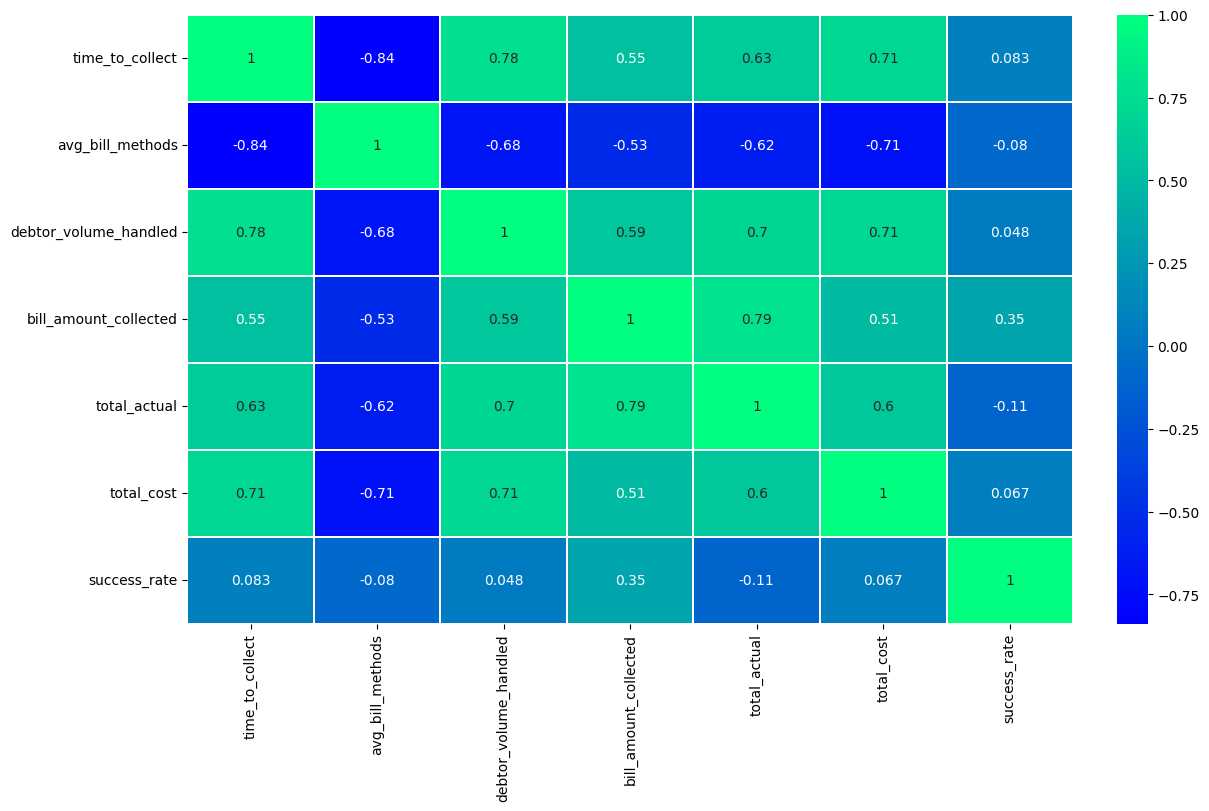

In [13]:
fig, ax = plt.subplots(figsize=(12, 8), layout="constrained")
sns.heatmap(data=df_kolektor.corr(), linecolor="white", linewidths=.2, annot=True, cmap="winter", ax=ax)
plt.show()

In [14]:
bill_method = np.unique(bill_methods.inverse_transform(df_kolektor["avg_bill_methods"]))
bill_method2 = np.unique(bill_methods.transform(bill_method))
print({i: j for i, j in zip(bill_method, bill_method2)})

{'datang ke tempat': 0, 'panggilan': 1, 'sms or WA': 2, 'surat panggilan': 3}


In [15]:
df_kolektor["avg_bill_methods"] = bill_methods.inverse_transform(df_kolektor["avg_bill_methods"])

In [16]:
# for i in range(len(df)):
    

In [17]:
df_kolektor.to_csv("kolektor.csv")